# Clustering


O objetivo deste notebook é responder à seguinte pergunta: **Como as diferentes avaliações das hospedagens agrupam os anúncios coletados e quais são as características comuns das propriedades com classificações altas e baixas?**

Para atingir esse objetivo, vamos explorar e analisar os dados de avaliações de hospedagens. Vamos agrupar os anúncios com base em suas avaliações e identificar as características que são comuns entre propriedades com classificações altas e baixas. Essa análise ajudará a entender melhor os fatores que influenciam a satisfação dos hóspedes e as tendências gerais nas avaliações das propriedades.

## Pré-processamento

In [62]:
import pandas as pd

ds_path = 'data/rio_listings.csv'

df = pd.read_csv(ds_path, sep = ',')
df.describe()

,id,scrape_id,description,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.600800e+04,3.600800e+04,0.0,3.600800e+04,35999.000000,35999.000000,0.0,36008.000000,36008.000000,36008.000000,...,25721.000000,25723.000000,25722.000000,25722.000000,0.0,36008.000000,36008.000000,36008.000000,36008.000000,25706.000000
mean,4.445730e+17,2.023123e+13,NaN,1.784179e+08,17.221728,28.521237,NaN,-22.967580,-43.249377,4.071956,...,4.881911,4.868024,4.858699,4.701961,NaN,9.493224,8.647634,0.724228,0.114613,1.046277
std,4.418582e+17,0.000000e+00,NaN,1.769684e+08,95.150438,141.409181,NaN,0.034687,0.099241,2.358069,...,0.320784,0.340892,0.322370,0.442303,NaN,25.677082,25.412461,1.889419,0.985128,1.157816
min,1.787800e+04,2.023123e+13,NaN,1.671000e+03,1.000000,1.000000,NaN,-23.073276,-43.723009,1.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.863794e+07,2.023123e+13,NaN,2.416786e+07,1.000000,1.000000,NaN,-22.984712,-43.306566,2.000000,...,4.890000,4.870000,4.850000,4.620000,NaN,1.000000,1.000000,0.000000,0.000000,0.200000
50%,5.761368e+17,2.023123e+13,NaN,9.644573e+07,2.000000,3.000000,NaN,-22.972860,-43.194825,4.000000,...,5.000000,5.000000,4.970000,4.820000,NaN,2.000000,1.000000,0.000000,0.000000,0.670000
75%,8.726761e+17,2.023123e+13,NaN,3.256093e+08,6.000000,8.000000,NaN,-22.956277,-43.185573,5.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,5.000000,3.000000,1.000000,0.000000,1.500000
max,1.053823e+18,2.023123e+13,NaN,5.527145e+08,1405.000000,1927.000000,NaN,-22.749690,-43.104400,16.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,185.000000,185.000000,21.000000,19.000000,13.750000


Colunas relacionadas à avaliações:

In [63]:
reviews_data_cols = ['id', 'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

In [64]:
reviews_df  = df.loc[:, reviews_data_cols]
reviews_df.describe()

,id,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3.600800e+04,36008.000000,36008.000000,36008.000000,25725.000000,25722.000000,25723.000000,25721.000000,25723.000000,25722.000000,25722.000000,25706.000000
mean,4.445730e+17,19.545545,7.117307,0.437986,4.785622,4.804016,4.745078,4.881911,4.868024,4.858699,4.701961,1.046277
std,4.418582e+17,40.600380,11.662121,1.030319,0.397027,0.393640,0.440203,0.320784,0.340892,0.322370,0.442303,1.157816
min,1.787800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2.863794e+07,0.000000,0.000000,0.000000,4.730000,4.770000,4.670000,4.890000,4.870000,4.850000,4.620000,0.200000
50%,5.761368e+17,4.000000,2.000000,0.000000,4.910000,4.930000,4.890000,5.000000,5.000000,4.970000,4.820000,0.670000
75%,8.726761e+17,20.000000,9.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.500000
max,1.053823e+18,638.000000,124.000000,14.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,13.750000


- **number_of_reviews**: O número de avaliações por anúncio varia de 0 a 638, com uma média de aproximadamente 19.55 e um desvio padrão de 40.60. Isto sugere que, embora a maioria dos anúncios tenha relativamente poucas avaliações, há alguns poucos com um número significativamente maior de avaliações.

- **number_of_reviews_l30d**: Representa o número de avaliações nos últimos 30 dias. A média é bastante baixa, 0.44, com um desvio padrão de 1.03, indicando que muitos anúncios podem não receber avaliações frequentes. De fato, a média de reviews_per_month é de 1.05, o que indica que a maior parte dos anúncios recebe apenas um review por mês.

In [65]:
total_reviews_null = reviews_df['review_scores_rating'].isnull().sum()
total_reviews_null

10283

Removemos anúncios que não possuem avaliações, uma vez que estes nunca foram alugados e portanto é impossível inferir uma nota para eles. Logo, é impossível imputar dados, restando como única opção remover estas instâncias do dataset que são cerca de 10000.

In [66]:
reviews_df.dropna(inplace=True)
reviews_df

,id,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,17878,311,29,4,2010-07-15,2023-12-22,4.70,4.77,4.65,4.83,4.91,4.77,4.67,1.90
1,25026,275,29,2,2010-06-07,2023-12-03,4.72,4.70,4.79,4.81,4.92,4.84,4.60,1.67
2,35764,454,36,2,2010-10-03,2023-12-17,4.90,4.93,4.93,4.97,4.95,4.94,4.89,2.82
3,41198,17,0,0,2013-06-04,2016-02-09,4.21,3.88,4.25,4.69,4.56,4.44,4.38,0.13
4,326205,152,14,0,2012-04-18,2023-11-21,4.57,4.72,4.46,4.83,4.77,4.83,4.59,1.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35705,1050983885488768140,1,1,1,2023-12-23,2023-12-23,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
35755,1051622041892292848,1,1,1,2023-12-22,2023-12-22,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
35877,1052351794224065415,1,1,1,2023-12-24,2023-12-24,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
35995,1053655074004481557,3,3,3,2023-12-25,2023-12-27,5.00,5.00,5.00,5.00,5.00,5.00,5.00,3.00


Para realizar o agrupamento, vamos pegar apenas as colunas que possuem pontuações à respeito de características dos anúncios.

In [67]:
clustering_df = reviews_df[[
  'review_scores_rating', 
  'review_scores_accuracy', 
  'review_scores_cleanliness', 
  'review_scores_checkin', 
  'review_scores_communication', 
  'review_scores_location',
  'review_scores_value']]
clustering_df

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4.70,4.77,4.65,4.83,4.91,4.77,4.67
1,4.72,4.70,4.79,4.81,4.92,4.84,4.60
2,4.90,4.93,4.93,4.97,4.95,4.94,4.89
3,4.21,3.88,4.25,4.69,4.56,4.44,4.38
4,4.57,4.72,4.46,4.83,4.77,4.83,4.59
...,...,...,...,...,...,...,...
35705,5.00,5.00,5.00,5.00,5.00,5.00,5.00
35755,5.00,5.00,5.00,5.00,5.00,5.00,5.00
35877,5.00,5.00,5.00,5.00,5.00,5.00,5.00
35995,5.00,5.00,5.00,5.00,5.00,5.00,5.00


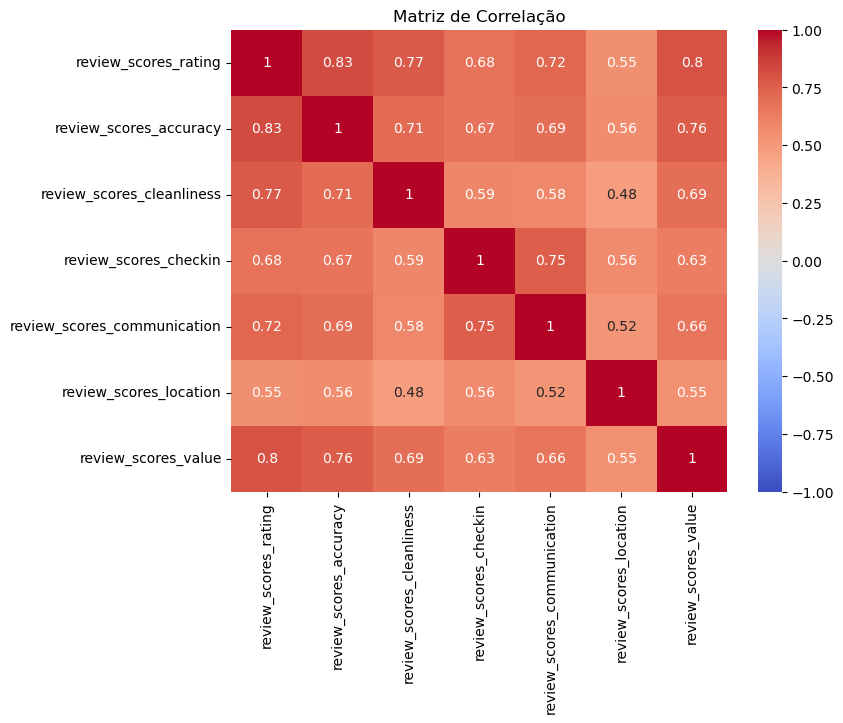

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = clustering_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

Como ```review_score_rating``` representa uma média dos outros valores, ela estará fortemente correlacionada com as outras. Logo, vamos remover esta coluna para simplificar o agrupamento.

In [69]:
clustering_df.drop(columns=['review_scores_rating'], axis=1, inplace=True)

/tmp/ipykernel_689988/3310550794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df.drop(columns=['review_scores_rating'], axis=1, inplace=True)


## Estatísticas

In [70]:
clustering_df.describe()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,25699.000000,25699.000000,25699.000000,25699.000000,25699.000000,25699.000000
mean,4.803918,4.745034,4.881927,4.867901,4.858573,4.701694
std,0.393712,0.439878,0.320400,0.341027,0.322486,0.442411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.770000,4.670000,4.890000,4.870000,4.850000,4.620000
50%,4.930000,4.890000,5.000000,5.000000,4.970000,4.820000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


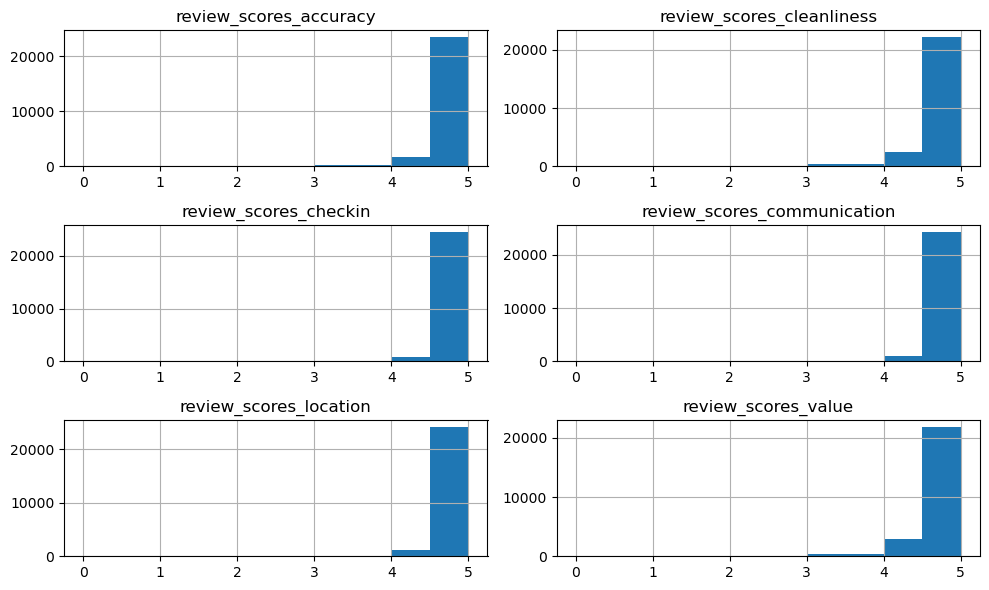

In [71]:
import matplotlib.pyplot as plt
clustering_df.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [72]:
clustering_df.describe()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,25699.000000,25699.000000,25699.000000,25699.000000,25699.000000,25699.000000
mean,4.803918,4.745034,4.881927,4.867901,4.858573,4.701694
std,0.393712,0.439878,0.320400,0.341027,0.322486,0.442411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.770000,4.670000,4.890000,4.870000,4.850000,4.620000
50%,4.930000,4.890000,5.000000,5.000000,4.970000,4.820000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [73]:
clustering_df

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4.77,4.65,4.83,4.91,4.77,4.67
1,4.70,4.79,4.81,4.92,4.84,4.60
2,4.93,4.93,4.97,4.95,4.94,4.89
3,3.88,4.25,4.69,4.56,4.44,4.38
4,4.72,4.46,4.83,4.77,4.83,4.59
...,...,...,...,...,...,...
35705,5.00,5.00,5.00,5.00,5.00,5.00
35755,5.00,5.00,5.00,5.00,5.00,5.00
35877,5.00,5.00,5.00,5.00,5.00,5.00
35995,5.00,5.00,5.00,5.00,5.00,5.00


## Agrupamento

Para a escolha do algoritmo, consideramos que o tamanho do dataset é pequeno. Além disso, levando em conta que se trata de avaliações, que por sua natureza são naturalmente enviesadas e possuem outliers que são significativos para a análise final, optamos por utilizar um algoritmo aglomerativo hierárquico.

O algoritmo aglomerativo hierárquico é adequado para pequenos datasets devido à sua complexidade computacional, que pode ser gerenciada eficientemente em casos de menor escala.

In [74]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import sys
import seaborn as sns

In [75]:
sys.setrecursionlimit(30000)

Escalonamos os dados usando StandardScaler para padronizar as features.

In [76]:
scaler = StandardScaler()
clustering_df_scaled = scaler.fit_transform(clustering_df)

Realizamos o agrupamento hierárquica usando o método de Ward e, em seguida, plotamos o dendrograma.

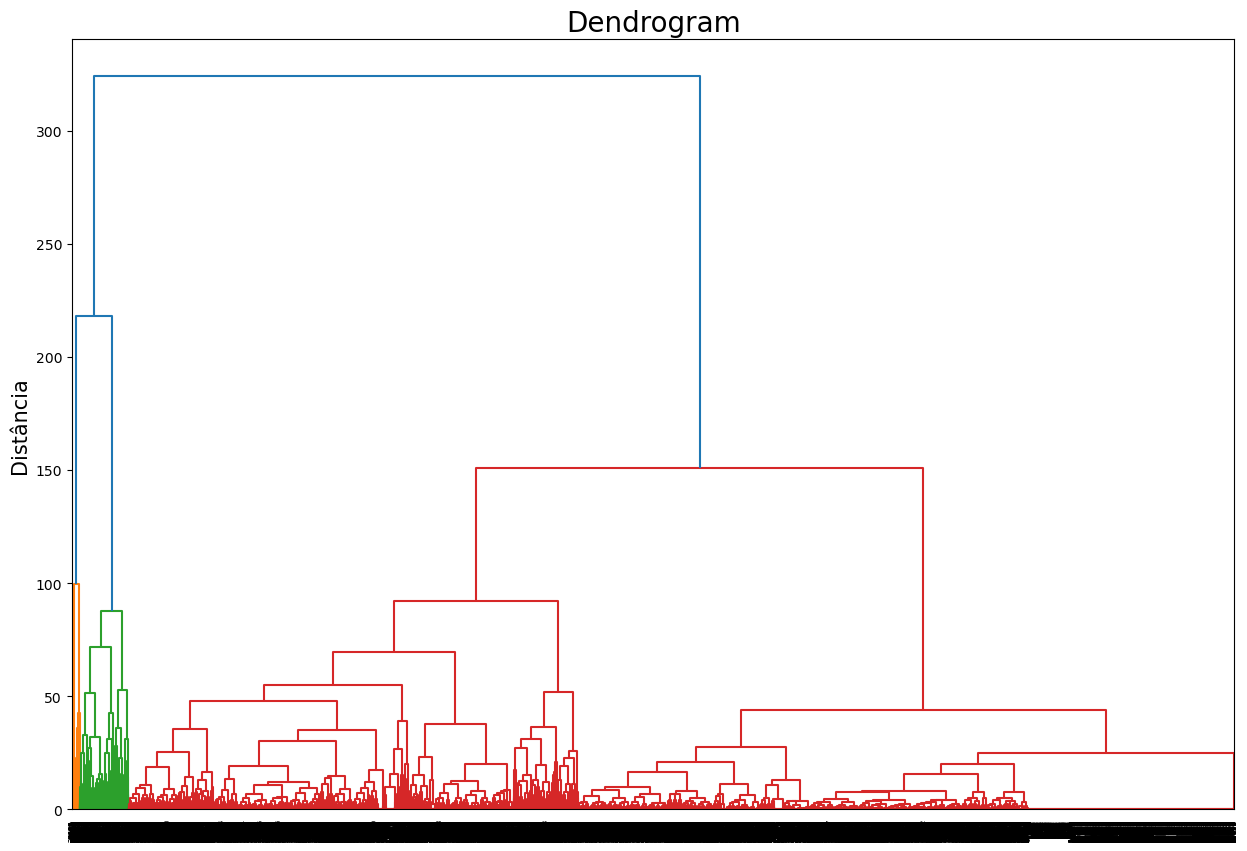

In [77]:
Z = linkage(clustering_df_scaled, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(
    Z,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=False,
    color_threshold=200, 
)

plt.title('Dendrograma', fontsize=20)
plt.xlabel('', fontsize=15)
plt.ylabel('Distância', fontsize=15)
plt.show()

Analisando o dendograma, identificamos 3 clusters.

Aplicamos o algoritmo de clustering aglomerativo hierárquico com o número de clusters definido como 3 (baseado na análise do dendrograma anterior). Após ajustar o modelo, adicionamos a coluna 'Cluster' ao DataFrame original para identificar a qual cluster cada amostra pertence.

In [78]:
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agglomerative.fit_predict(clustering_df_scaled)

clustering_df['Cluster'] = clusters

label_mapping = {0: 0, 1: 2, 2: 1}
clustering_df['Cluster'] = clustering_df['Cluster'].map(label_mapping)

clustering_df.head()

/tmp/ipykernel_689988/2984376665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['Cluster'] = clusters
/tmp/ipykernel_689988/2984376665.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['Cluster'] = clustering_df['Cluster'].map(label_mapping)


,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Cluster
0,4.77,4.65,4.83,4.91,4.77,4.67,0
1,4.70,4.79,4.81,4.92,4.84,4.60,0
2,4.93,4.93,4.97,4.95,4.94,4.89,0
3,3.88,4.25,4.69,4.56,4.44,4.38,0
4,4.72,4.46,4.83,4.77,4.83,4.59,0


Calculamos a média de cada característica dentro de cada cluster. Agrupamos os dados pelo rótulo do cluster e, em seguida, calculamos a média para cada coluna. Este passo nos ajuda a entender as características típicas de cada cluster.

In [79]:
cluster_means = clustering_df.groupby('Cluster').mean()

cluster_means_df = cluster_means.reset_index()
cluster_means_df


,Cluster,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,0,4.860029,4.800383,4.921798,4.910659,4.901198,4.763787
1,1,3.977790,3.914036,4.392125,4.350009,4.217753,3.765431
2,2,2.114176,2.186154,2.400110,2.163077,2.892967,1.854560


Contamos o número de amostras em cada cluster.

In [80]:
cluster_counts = clustering_df['Cluster'].value_counts().reset_index()

cluster_counts.columns = ['Cluster', 'Count']

print("Cluster Counts:")
print(cluster_counts)


Cluster Counts:
   Cluster  Count
0        0  24449
1        1   1068
2        2    182


Criamos um heatmap para visualizar as médias das características de cada cluster.

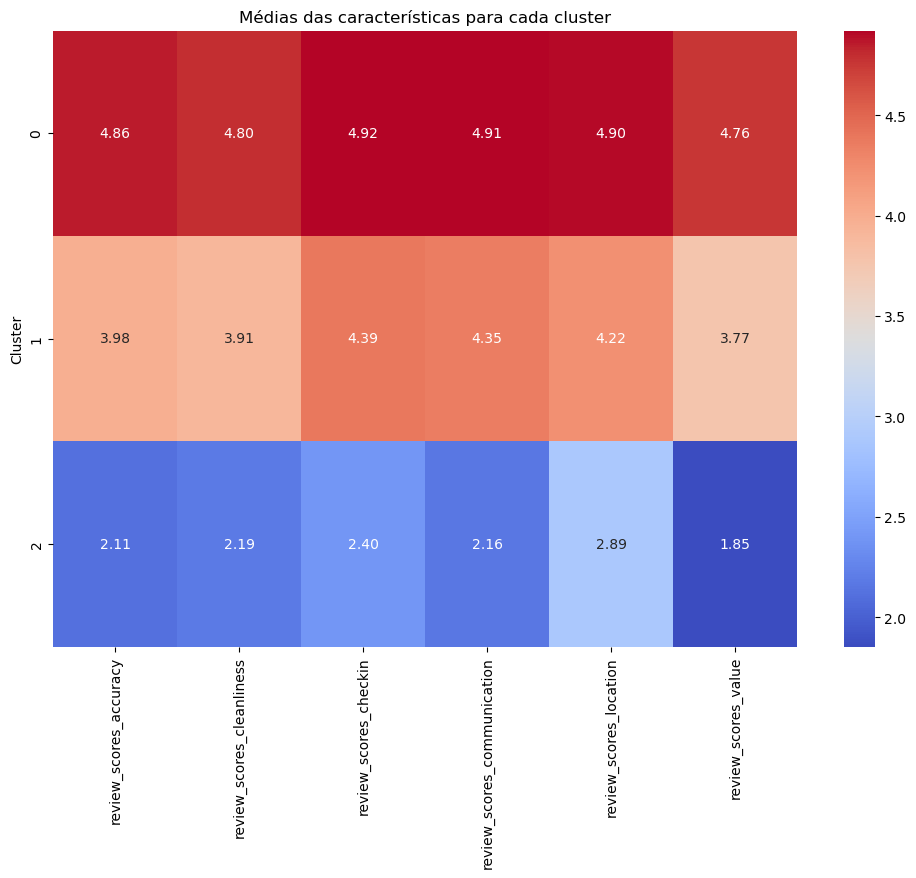

In [81]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Médias das características para cada cluster')
plt.show()


Criamos gráficos de dispersão pareados das características, coloridos pelos clusters. Isso nos permite visualizar como as amostras de diferentes clusters se distribuem em relação a diferentes pares de características. A linha de densidade no diagnóstico ajuda a entender a distribuição de cada característica individualmente.

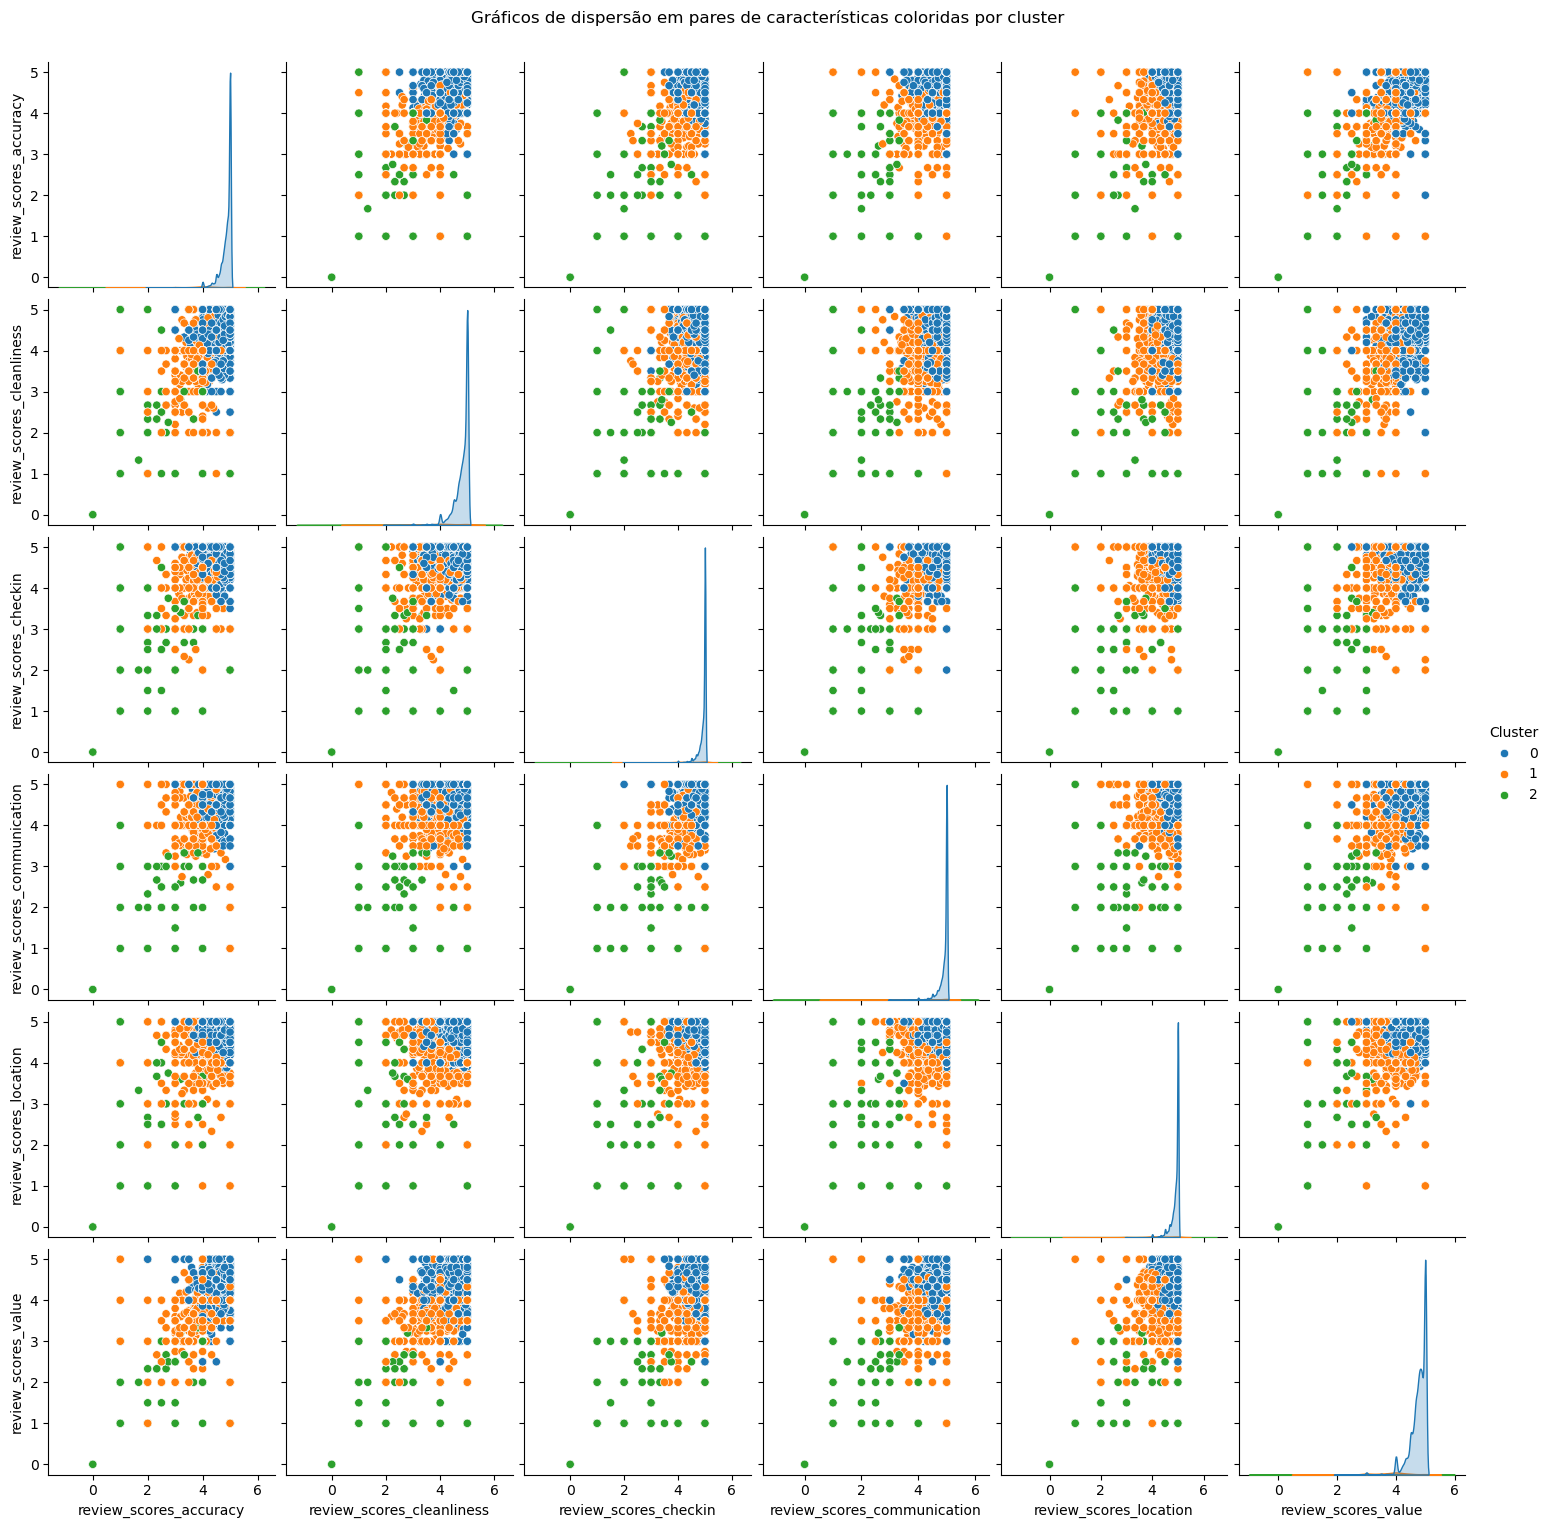

In [82]:
pairplot = sns.pairplot(clustering_df, hue='Cluster', diag_kind='kde', palette='tab10')
pairplot.fig.suptitle('Gráficos de dispersão em pares de características coloridas por cluster', y=1.02)

plt.show()

## Conclusão

Calculamos a pontuação de silhueta para avaliar a qualidade do clustering. A pontuação de silhueta mede o quão similar uma amostra é ao seu próprio cluster em comparação com outros clusters. Uma pontuação mais alta indica que as amostras estão bem agrupadas. Este passo é crucial para validar a eficácia do modelo de clustering.


In [83]:

from sklearn.metrics import silhouette_score

sil_score = silhouette_score(clustering_df_scaled, clusters)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.7191503088580093


O **Silhouette Score** é uma métrica usada para avaliar a qualidade de uma clusterização. Ele mede o quão similar um ponto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). O valor do Silhouette Score varia de -1 a 1:

- **1** indica que o ponto está muito bem agrupado com o seu cluster e é claramente separado dos outros clusters.
- **0** indica que o ponto está no limite entre dois clusters.
- **-1** indica que o ponto pode ter sido agrupado no cluster errado.

Um **Silhouette Score de 0.72** significa que, em média, os pontos estão bem agrupados dentro dos seus clusters e são bem separados dos outros clusters. Esse é um valor relativamente alto, sugerindo que os dados foram bem agrupados.

In [84]:
differences = cluster_means.max() - cluster_means.min()
differences_sorted = differences.sort_values(ascending=False)

print("\nDiferenças de características entre os clusters com maior pontuação e os com menor:")
print(differences_sorted)

most_important_characteristics = differences_sorted.index.tolist()

print("\nCaracterísticas mais importantes para determinar as pontuações:")
most_important_characteristics


Diferenças de características entre os clusters com maior pontuação e os com menor:
review_scores_value            2.909227
review_scores_communication    2.747582
review_scores_accuracy         2.745853
review_scores_cleanliness      2.614229
review_scores_checkin          2.521688
review_scores_location         2.008231
dtype: float64

Características mais importantes para determinar as pontuações:


['review_scores_value',
 'review_scores_communication',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_location']

Os resultados de clustering encontrados para clustering_df mostram três clusters com as seguintes características:

- Cluster 0: Notas altas (17.884 instâncias)
- Cluster 1: notas moderadas (7.652 instâncias)
- Cluster 2: Notas baixas (182 instâncias)

A distribuição de instâncias entre os clusters é altamente enviesada. O Cluster 0 (notas altas) tem a maioria das instâncias, o Cluster 1 (notas moderadas) tem um número significativo, enquanto o Cluster 2 (notas baixas) tem muito poucas instâncias.

Este enviesamento reflete a distribuição real dos dados, em que a maioria das propriedades recebe pontuações elevadas, algumas recebem pontuações moderadas e muito poucas recebem pontuações baixas. É comum que os dados de avaliação sejam positivamente enviesados, com a maioria das avaliações sendo altas.

O tamanho pequeno do Grupo 2 pode indicar exceções genuínas ou propriedades que são geralmente de baixa qualidade.

Características mais importantes para obter reviews altas:

- Valor da estadia: Esta caraterística apresenta a maior diferença entre as classificações altas e baixas, indicando que os hóspedes dão grande prioridade à obtenção de uma boa relação custo x benefício.

- Exatidão e comunicação: Estas características são cruciais, uma vez que têm um impacto significativo nas experiências e percepções dos hóspedes.

- Limpeza, check-in e Localização: Embora importantes, possuem um impacto ligeiramente menor em comparação com as outras características.


In [85]:
reviews_df['Cluster'] = clusters
label_mapping = {0: 0, 1: 2, 2: 1}
reviews_df['Cluster'] = reviews_df['Cluster'].map(label_mapping)
reviews_df.head()

,id,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Cluster
0,17878,311,29,4,2010-07-15,2023-12-22,4.70,4.77,4.65,4.83,4.91,4.77,4.67,1.90,0
1,25026,275,29,2,2010-06-07,2023-12-03,4.72,4.70,4.79,4.81,4.92,4.84,4.60,1.67,0
2,35764,454,36,2,2010-10-03,2023-12-17,4.90,4.93,4.93,4.97,4.95,4.94,4.89,2.82,0
3,41198,17,0,0,2013-06-04,2016-02-09,4.21,3.88,4.25,4.69,4.56,4.44,4.38,0.13,0
4,326205,152,14,0,2012-04-18,2023-11-21,4.57,4.72,4.46,4.83,4.77,4.83,4.59,1.07,0


In [86]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [87]:
merged_df = pd.merge(reviews_df, df, on='id', how='inner')
merged_df

,id,number_of_reviews_x,number_of_reviews_ltm_x,number_of_reviews_l30d_x,first_review_x,last_review_x,review_scores_rating_x,review_scores_accuracy_x,review_scores_cleanliness_x,review_scores_checkin_x,...,review_scores_communication_y,review_scores_location_y,review_scores_value_y,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month_y
0,17878,311,29,4,2010-07-15,2023-12-22,4.70,4.77,4.65,4.83,...,4.91,4.77,4.67,NaN,f,1,1,0,0,1.90
1,25026,275,29,2,2010-06-07,2023-12-03,4.72,4.70,4.79,4.81,...,4.92,4.84,4.60,NaN,f,1,1,0,0,1.67
2,35764,454,36,2,2010-10-03,2023-12-17,4.90,4.93,4.93,4.97,...,4.95,4.94,4.89,NaN,f,1,1,0,0,2.82
3,41198,17,0,0,2013-06-04,2016-02-09,4.21,3.88,4.25,4.69,...,4.56,4.44,4.38,NaN,f,2,2,0,0,0.13
4,326205,152,14,0,2012-04-18,2023-11-21,4.57,4.72,4.46,4.83,...,4.77,4.83,4.59,NaN,f,5,5,0,0,1.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25694,1050983885488768140,1,1,1,2023-12-23,2023-12-23,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,NaN,f,1,1,0,0,1.00
25695,1051622041892292848,1,1,1,2023-12-22,2023-12-22,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,NaN,f,1,0,1,0,1.00
25696,1052351794224065415,1,1,1,2023-12-24,2023-12-24,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,NaN,f,11,7,4,0,1.00
25697,1053655074004481557,3,3,3,2023-12-25,2023-12-27,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,NaN,t,4,4,0,0,3.00


In [88]:


superhost_distribution = merged_df.groupby(['Cluster', 'host_is_superhost']).size().unstack().fillna(0)
superhost_distribution

host_is_superhost,f,t
Cluster,,
0,15748,8647
1,986,81
2,178,4


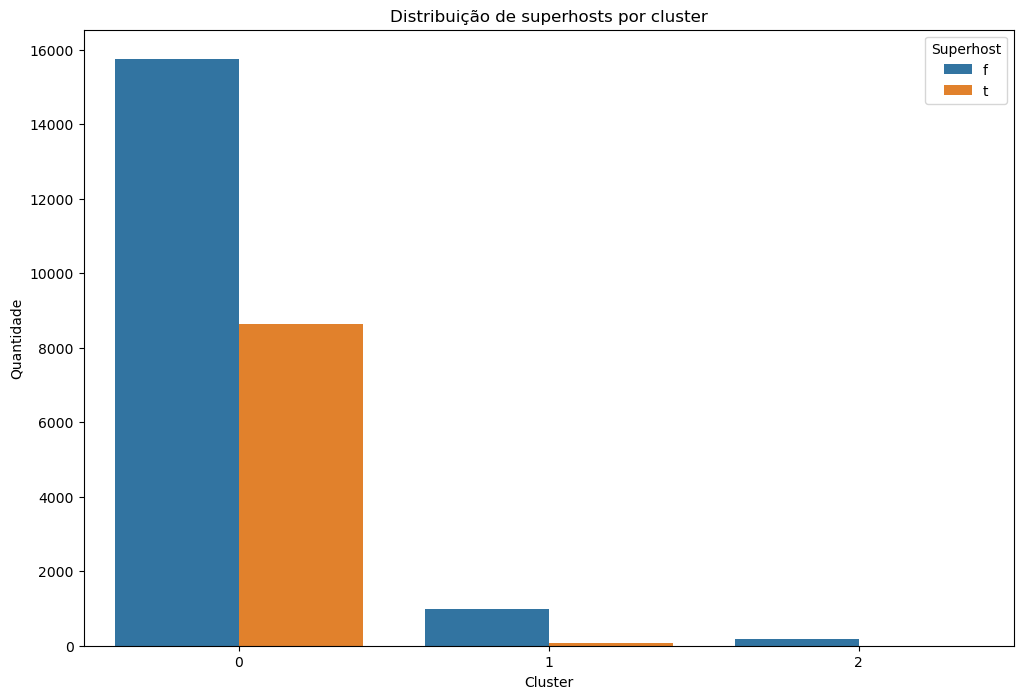

In [89]:
superhost_distribution_long = superhost_distribution.reset_index().melt(id_vars='Cluster', value_name='Count')
superhost_distribution_long.columns = ['Cluster', 'Superhost', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(x='Cluster', y='Count', hue='Superhost', data=superhost_distribution_long)
plt.title('Distribuição de superhosts por cluster')
plt.xlabel('Cluster')
plt.ylabel('Quantidade')
plt.show()

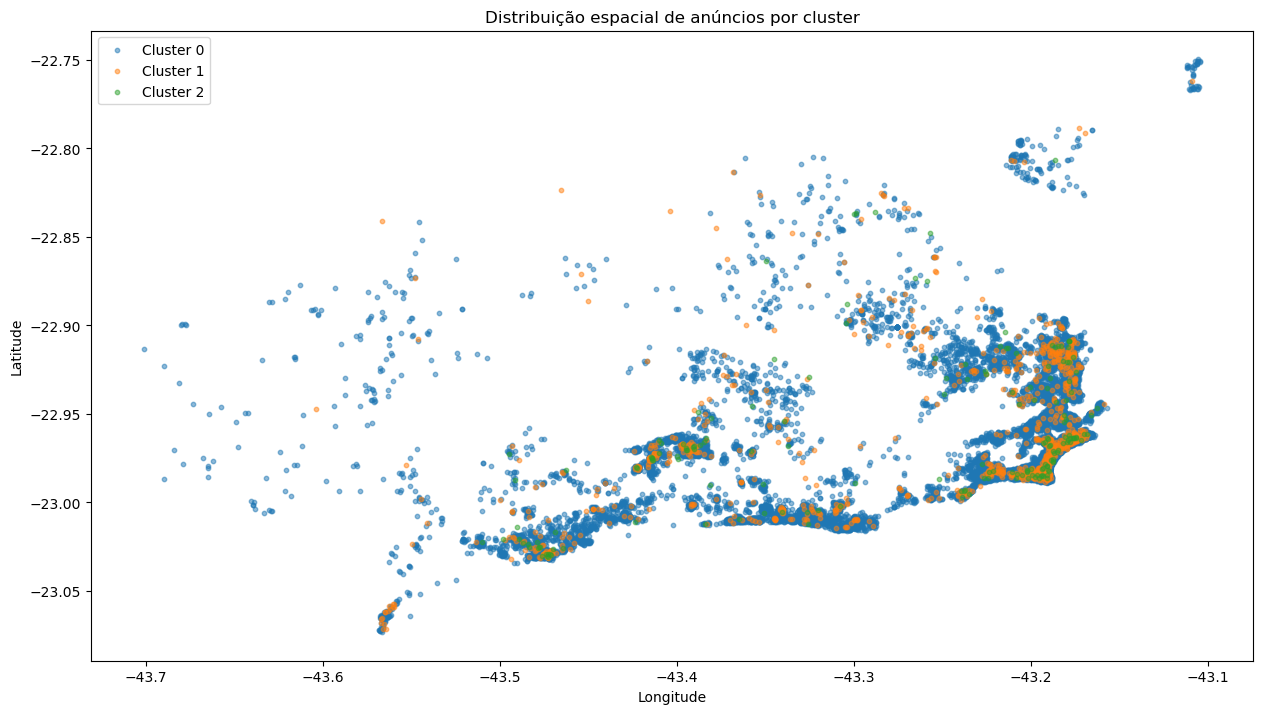

In [90]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(merged_df['longitude'], merged_df['latitude'])]
geo_df = gpd.GeoDataFrame(merged_df, geometry=geometry)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for cluster in geo_df['Cluster'].unique():
    geo_df[geo_df['Cluster'] == cluster].plot(ax=ax, markersize=10, label=f'Cluster {cluster}', alpha=0.5)

plt.title("Distribuição espacial de anúncios por cluster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()



Average Price by Cluster:
 Cluster
0    995.488512
1    981.253326
2    821.443134
Name: price, dtype: float64


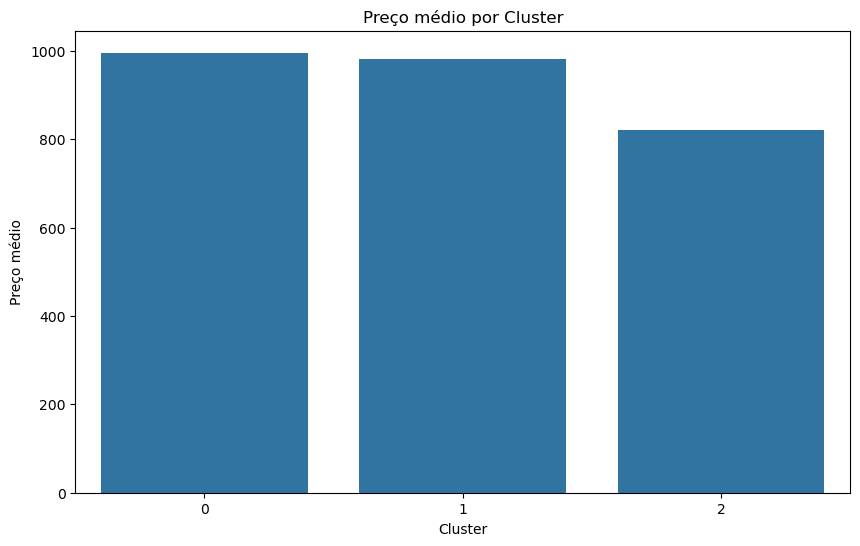

In [91]:
merged_df['price'] = merged_df['price'].replace('[\$,]', '', regex=True).astype(float)
merged_df['price'] = merged_df['price'].fillna(merged_df['price'].mean())

price_distribution = merged_df.groupby('Cluster')['price'].mean()
print("\nAverage Price by Cluster:\n", price_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=price_distribution.index, y=price_distribution.values)
plt.title("Preço médio por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Preço médio")
plt.show()